<p style="text-align:center;">
<img src=https://noodle.digitalfutures.com/studentuploads/Data_Cygnets_logo.png width = 150px, height=150px/
     style="float: center; " />
</p>

# Swan Teleco data
Using Logistic Regression to predict the customer churn probabilities
### by Data Cygnets
🦢 Jamie M   
🦢 Muqadas   
🦢 Sennan   
🦢 Maarja

# Part 1 - Set up
---

## Load dependencies

In [1]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

## Load the data

In [2]:
# @title
df = pd.read_excel('https://github.com/Sennan-Li/Datasets/raw/refs/heads/main/Swan%20Consulting/Swan%20Project%20Data.xlsx')

In [3]:
# @title
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


# Part 2 - Preprocessing
---

In [5]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
# @title
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)
df['Total Charges'] = df['Total Charges'].replace(' ', 0)
df['Total Charges'] = df['Total Charges'].astype(float)

/var/folders/ql/gj760q1d595__8_rc59b6bnw0000gn/T/ipykernel_21699/2672931447.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total Charges'] = df['Total Charges'].replace(' ', 0)


In [7]:
# @title
# df.to_excel('Cleaned Swan Project Data.xlsx', index=False)

# Part 3 - EDA
---

## 📊 View the Statistics


In [8]:
# @title
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000


## ⬆️ Getting to know our customers inside and out ⬇️

### 💁 **Customer Insight 1:** Customer Distribution & Per Customer Transaction


- **Majority** of our customers are **non-senior**, **single**, **without dependents**
- However, **Senior customers** and **customers with partners** tend to have **higher transaction values**.

📊 **Customer Distribution**

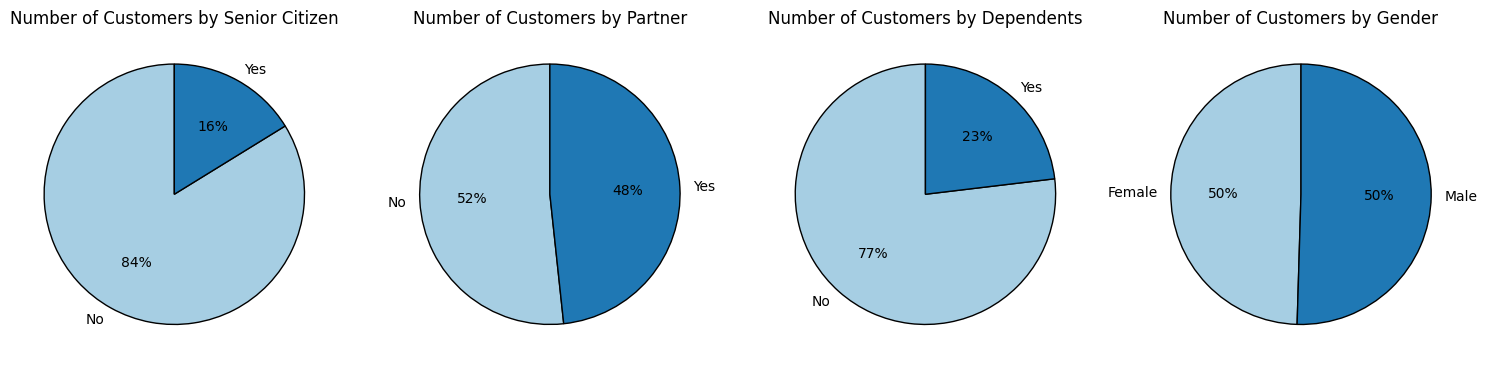

In [9]:
# @title
fields = ['Senior Citizen', 'Partner', 'Dependents', 'Gender']

rows, cols = 1, 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 15), tight_layout=True)
axes = axes.flatten()

for i, field in enumerate(fields):
    grouped_data = df.groupby(field)['CustomerID'].count().reset_index()
    axes[i].pie(
        grouped_data['CustomerID'],
        labels=grouped_data[field],
        autopct='%1.0f%%',
        startangle=90,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i].set_title(f'Number of Customers by {field}')

# Hide unused subplots
for j in range(len(fields), len(axes)):
    fig.delaxes(axes[j])
plt.show()


💰 **Per Customer Transaction**

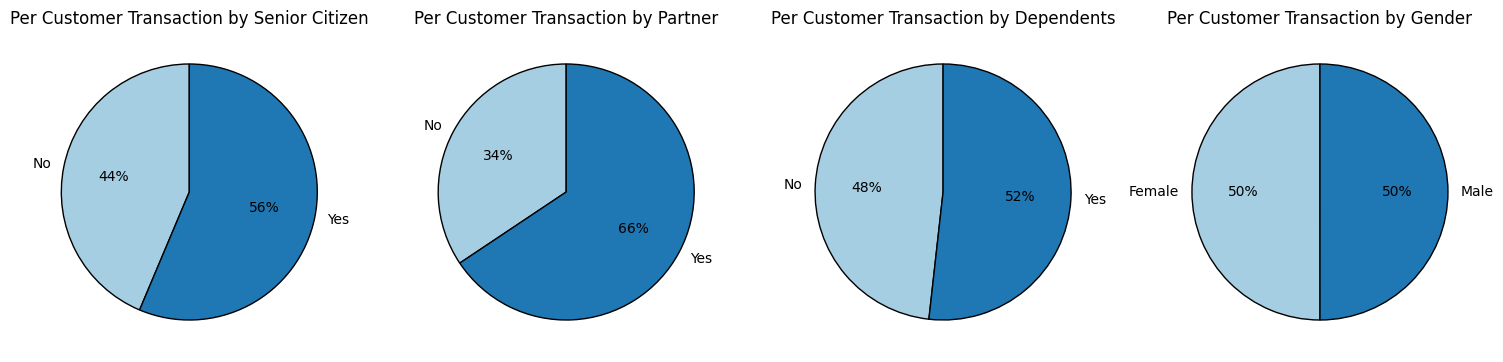

In [10]:
# @title
fields = ['Senior Citizen', 'Partner', 'Dependents', 'Gender']

rows, cols = 1, 4
fig, axes = plt.subplots(rows, cols, figsize=(15, 15), tight_layout=True)
axes = axes.flatten()

for i, field in enumerate(fields):
    grouped_data = df.groupby(field)['Total Charges'].mean().reset_index()
    axes[i].pie(
        grouped_data['Total Charges'],
        labels=grouped_data[field],
        autopct='%1.0f%%',
        startangle=90,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i].set_title(f'Per Customer Transaction by {field}')

# Hide unused subplots
for j in range(len(fields), len(axes)):
    fig.delaxes(axes[j])
plt.show()

### 📞 **Customer Insight 2:** Phone Service & its conversion rate to add-on Multi-lines Service


- The **majority** of our customers use **Phone Service**.
- The conversion rate to Multi-Line Service stands at **46.7%**, reflecting **active  customer adoption of additional services**.

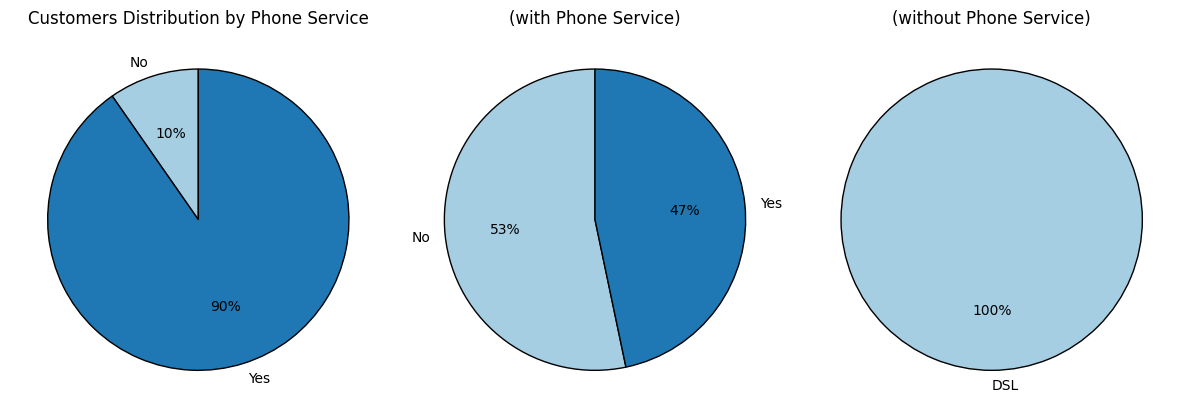

In [11]:
# @title
# Data for Phone Service distribution
phone_service = df.groupby('Phone Service')['CustomerID'].count()

# Data for Multiple Lines distribution (only for Phone Service = 'Yes')
multiline_service = df[df['Phone Service'] == 'Yes'].groupby('Multiple Lines')['CustomerID'].count()

internet_service_orders_without_phone = df[df['Phone Service'] == 'No'].groupby('Internet Service')['CustomerID'].count().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# First pie chart: Customers Distribution by Phone Service
axes[0].pie(
    phone_service,
    labels=phone_service.index,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Customers Distribution by Phone Service')

# Second pie chart: Phone Customers Distribution by Multiple Lines
axes[1].pie(
    multiline_service,
    labels=multiline_service.index,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
axes[1].set_title('(with Phone Service)')

# Third pie chart
axes[2].pie(
    internet_service_orders_without_phone['CustomerID'],
    labels=internet_service_orders_without_phone['Internet Service'],
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
axes[2].set_title('(without Phone Service)')
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### 🌐 **Customer Insight 3:** Internet Service & Its Add-on Services


- **Nearly half** of our customers are using **fiber optic** internet service.
- Customers with fiber optic connections most commonly choose add-on services like **Streaming Movies** and **Streaming TV**.
- Customers with **DSL connections** tend to prioritize add-ons like **Online Security** and **Tech Support**.

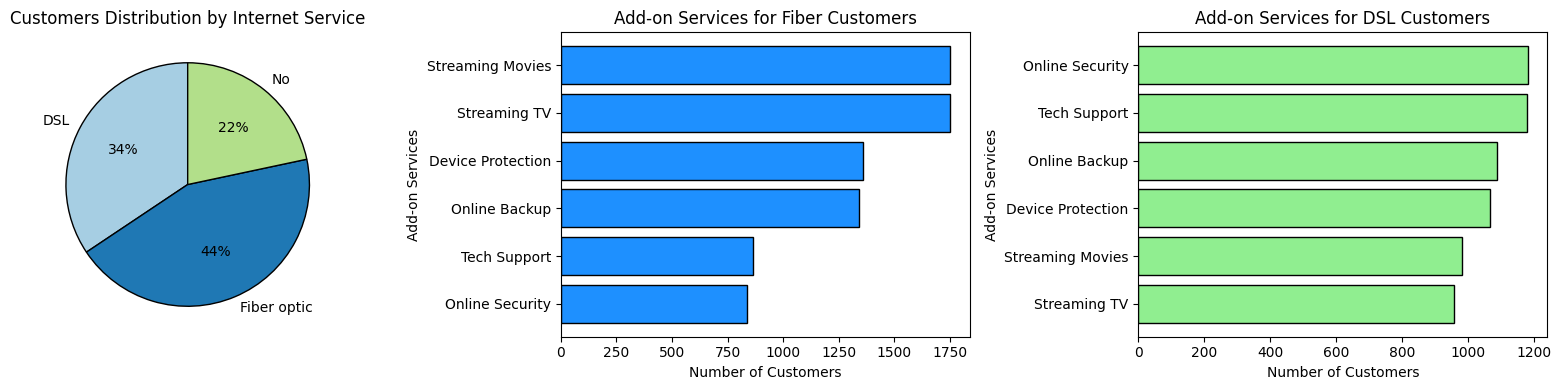

In [12]:
# @title
# Data setup
internet_service_orders_all = df.groupby('Internet Service')['CustomerID'].count().reset_index()

total_orders = {
    'Online Security': df[df['Online Security'] == 'Yes']['CustomerID'].count(),
    'Online Backup': df[df['Online Backup'] == 'Yes']['CustomerID'].count(),
    'Device Protection': df[df['Device Protection'] == 'Yes']['CustomerID'].count(),
    'Tech Support': df[df['Tech Support'] == 'Yes']['CustomerID'].count(),
    'Streaming TV': df[df['Streaming TV'] == 'Yes']['CustomerID'].count(),
    'Streaming Movies': df[df['Streaming Movies'] == 'Yes']['CustomerID'].count()
} # Collect total orders counts for all users

fiber = df[df['Internet Service'] == 'Fiber optic']
total_orders_fiber = {
    'Online Security': fiber[fiber['Online Security'] == 'Yes']['CustomerID'].count(),
    'Online Backup': fiber[fiber['Online Backup'] == 'Yes']['CustomerID'].count(),
    'Device Protection': fiber[fiber['Device Protection'] == 'Yes']['CustomerID'].count(),
    'Tech Support': fiber[fiber['Tech Support'] == 'Yes']['CustomerID'].count(),
    'Streaming TV': fiber[fiber['Streaming TV'] == 'Yes']['CustomerID'].count(),
    'Streaming Movies': fiber[fiber['Streaming Movies'] == 'Yes']['CustomerID'].count()
} # Collect total orders counts for fiber users

dsl = df[df['Internet Service'] == 'DSL']
total_orders_dsl = {
    'Online Security': dsl[dsl['Online Security'] == 'Yes']['CustomerID'].count(),
    'Online Backup': dsl[dsl['Online Backup'] == 'Yes']['CustomerID'].count(),
    'Device Protection': dsl[dsl['Device Protection'] == 'Yes']['CustomerID'].count(),
    'Tech Support': dsl[dsl['Tech Support'] == 'Yes']['CustomerID'].count(),
    'Streaming TV': dsl[dsl['Streaming TV'] == 'Yes']['CustomerID'].count(),
    'Streaming Movies': dsl[dsl['Streaming Movies'] == 'Yes']['CustomerID'].count()
} # Collect total orders counts for DSL users

df_total_orders = pd.DataFrame(list(total_orders.items()), columns=['Product', 'CustomerID']).sort_values(by='CustomerID', ascending=True)
df_total_orders_fiber = pd.DataFrame(list(total_orders_fiber.items()), columns=['Product', 'CustomerID']).sort_values(by='CustomerID', ascending=True)
df_total_orders_dsl = pd.DataFrame(list(total_orders_dsl.items()), columns=['Product', 'CustomerID']).sort_values(by='CustomerID', ascending=True)

# Subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 3 columns

# First pie chart: Customers Distribution by Internet Service
axes[0].pie(
    internet_service_orders_all['CustomerID'],
    labels=internet_service_orders_all['Internet Service'],
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Customers Distribution by Internet Service')

# Second bar chart: Fiber customers by add-on services
axes[1].barh(
    df_total_orders_fiber['Product'],
    df_total_orders_fiber['CustomerID'],
    color='dodgerblue',
    edgecolor='black',
)
axes[1].set_title('Add-on Services for Fiber Customers')
axes[1].set_xlabel('Number of Customers')
axes[1].set_ylabel('Add-on Services')

# Third bar chart: DSL customers by CustomerID for add-on services
axes[2].barh(
    df_total_orders_dsl['Product'],
    df_total_orders_dsl['CustomerID'],
    color='lightgreen',
    edgecolor='black',
)
axes[2].set_title('Add-on Services for DSL Customers')
axes[2].set_xlabel('Number of Customers')
axes[2].set_ylabel('Add-on Services')
plt.tight_layout()
plt.show()


### 💰 **Customer Insights 4:** Payment Preferences


- The **majority** of our customers prefer **month-to-month** payments, utilizing **electronic checks** and opting for **paperless bill**

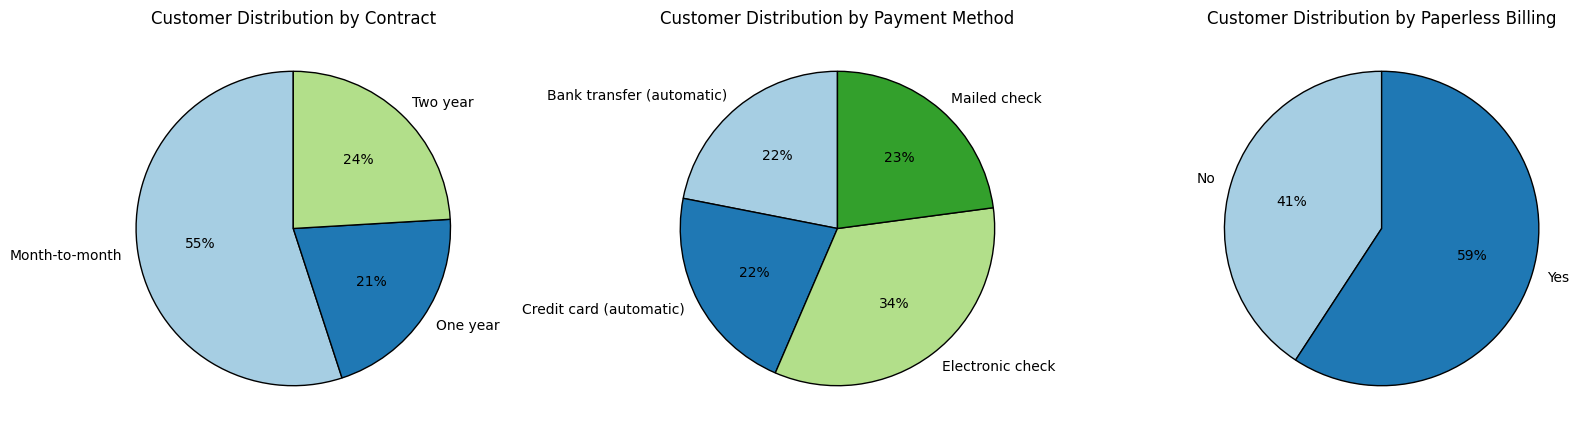

In [13]:
# @title
fields = ['Contract', 'Payment Method', 'Paperless Billing']

rows, cols = 1, 3
# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 16), tight_layout=True)
axes = axes.flatten()

for i, field in enumerate(fields):
    grouped_data = df.groupby(field)['Total Charges'].count().reset_index()
    axes[i].pie(
        grouped_data['Total Charges'],
        labels=grouped_data[field],
        autopct='%1.0f%%',
        startangle=90,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i].set_title(f'Customer Distribution by {field}')

plt.show()

### ✨ **Customer Insights Summary**

1. **Who Our Customers Are**❓
   - Most customers are **non-senior**, **single**, and **without dependents**. 👨
   - *However!* Seniors and partnered customers bring in **higher transaction values**! 💎  

2. **Phone Service Trends 📞**  
   - Phone Service is super **popular**!  
   - A 46.7% conversion rate to Multi-Line Service suggests that customers love **upgrading their experience**.🌟  

3. **Internet Service & Add-ons 🌐**  
   - Half of our customers prefer **fiber optic** for **Streaming TV and Movies**. 🎥  
   - **DSL users**? They are more into protective add-ons like **Online Security** and **Tech Support**. 💻

4. **Payment Habits 💳**  
   - Month-to-month billing with electronic checks and paperless preferences. 🌐


## 💸 Why Our Beloved Customers Are Drifting Away 🚶‍♀️🚶‍♂️

### 📊 **Churn Insight 1:** Overall Churning Rate & Retaining Rate


- **Positive:** 73.5% customer retention rate shows good customer loyalty.
- **Room for Improvement:** 26.5% churn rate is notable, we have to investigate reasons to reduce it.

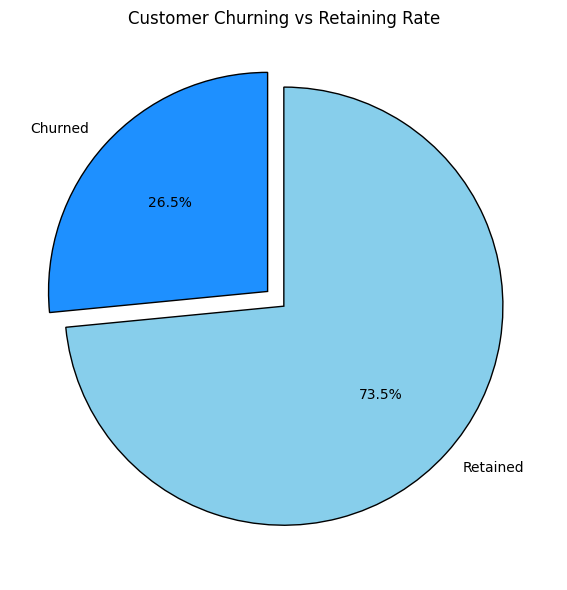

In [14]:
# @title
churned = df[df['Churn Label'] == 'Yes']
retained = df[df['Churn Label'] == 'No']
churning_rate = len(churned) / len(df) * 100
retaining_rate = len(retained) / len(df) * 100

plt.figure(figsize=(6, 6))
plt.pie(
    [churning_rate, retaining_rate],
    labels=['Churned', 'Retained'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['dodgerblue', 'skyblue'],
    explode=(0.1, 0),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Customer Churning vs Retaining Rate')
plt.tight_layout()
plt.show()

### 💰 **Churn Insight 2:** Tenure Months, Monthly Charges & Total Charges


- **Tenure:**
  - Customers with **less than one year of tenure** are at higher risk of churn.
  - Tenure **more than 5 years** has the most retained customers
- **Monthly Charges:**
  - With **charges below $30** retaining the most customers, it seems **affordability** is a key factor.
- **Profitability:**
 - The profitability of retained customers indicates that **improving retention** efforts can directly **increase revenue**.

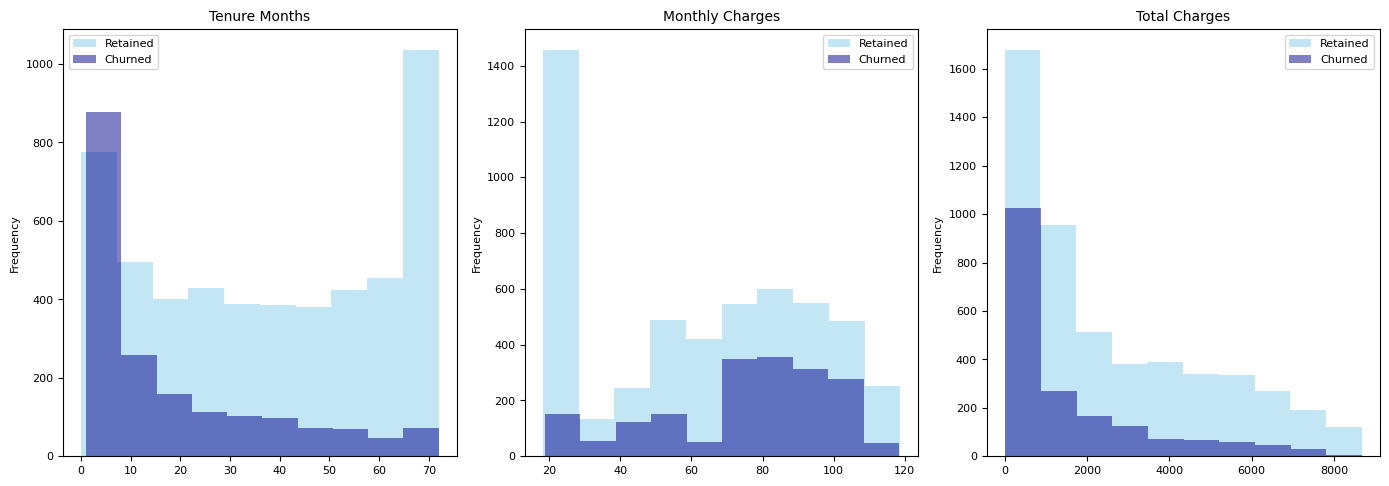

In [15]:
# @title
fields = ['Tenure Months', 'Monthly Charges', 'Total Charges']
rows, cols = 3, 3
fig, subfig = plt.subplots(rows, cols, figsize=(14, 14), tight_layout=True)

for graph, field in zip(subfig.flatten(), fields):
    graph.hist(retained[field], bins=10, alpha=0.5, label='Retained', color='skyblue')
    graph.hist(churned[field], bins=10, alpha=0.5, label='Churned', color='darkblue')
    graph.set_title(field.title(), fontsize=10)
    graph.set_ylabel('Frequency', fontsize=8)
    graph.tick_params(axis='both', labelsize=8)
    graph.legend(fontsize=8)

# Hide any unused subplots
[fig.delaxes(subfig.flatten()[i]) for i in range(len(fields), rows * cols)]
plt.show()


### 🧍‍♂️ **Churn Insight 3:** Senior Citizen, Family Makeup


- Majority of the churner are **non-senior**, **single**, **without dependents**, same as retained customers.

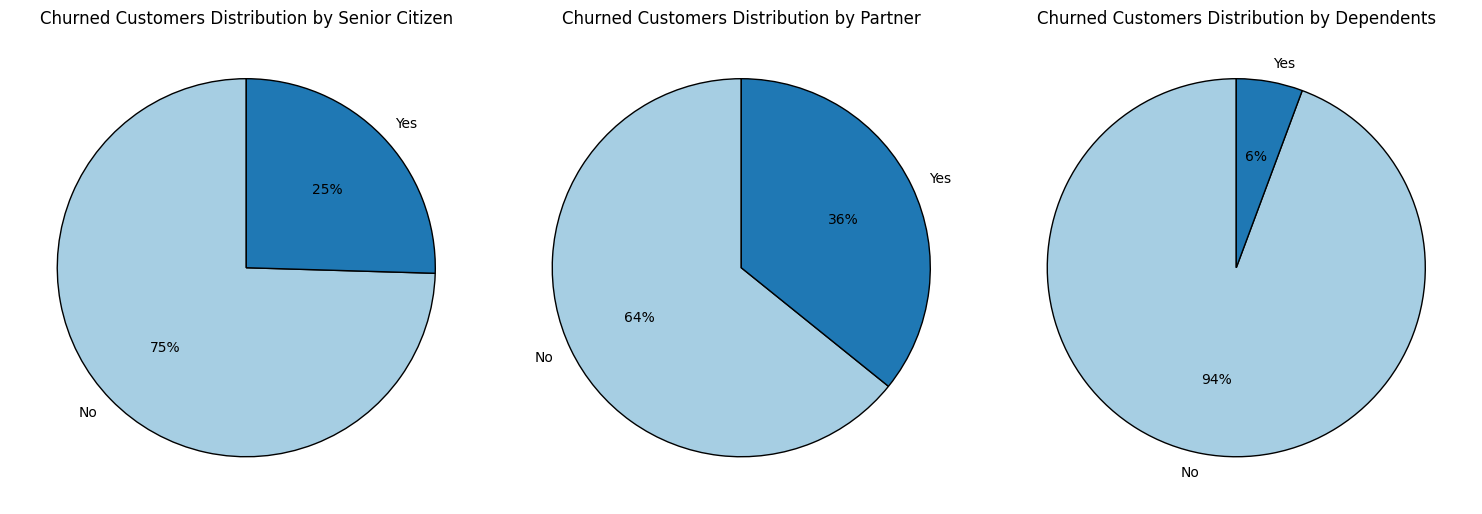

In [16]:
# @title
fields = ['Senior Citizen', 'Partner', 'Dependents']

rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 15), tight_layout=True)
axes = axes.flatten()

for i, field in enumerate(fields):
    grouped_data = churned.groupby(field)['CustomerID'].count().reset_index()
    axes[i].pie(
        grouped_data['CustomerID'],
        labels=grouped_data[field],
        autopct='%1.0f%%',
        startangle=90,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'}
    )
    axes[i].set_title(f'Churned Customers Distribution by {field}')

# Hide unused subplots
for j in range(len(fields), len(axes)):
    fig.delaxes(axes[j])
plt.show()


### 📞 **Churn Insight 4:** Phone Service & Its Add-on Multi-lines Service


- **Phone Service:** 91% of churned customers had phone service, cannot be a reason for churn, as nearly every customer gets phone services.
- **Multi-lines:** Among churned customers with phone service, half had multi-lines and half didn't. No clear preference or deterrence from multi-lines for churn.

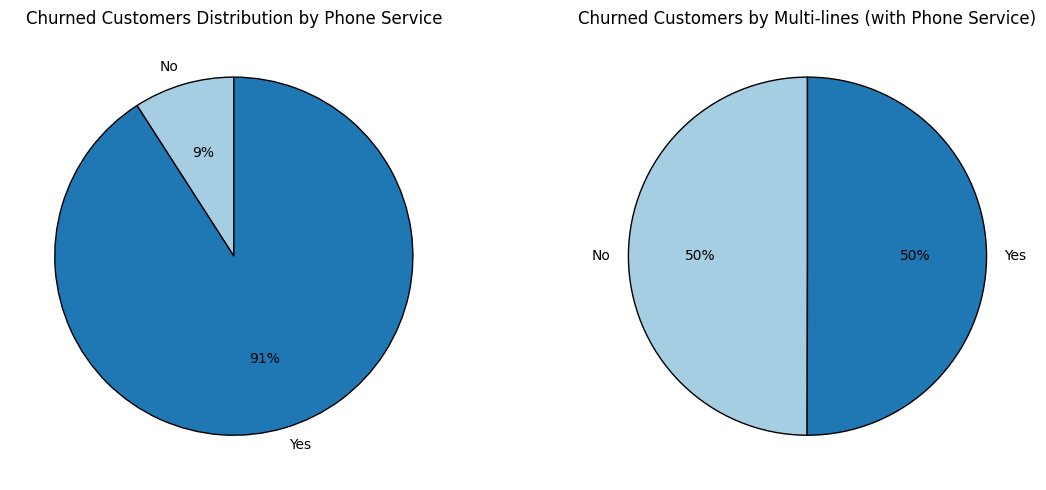

In [17]:
# @title
# Data for Phone Service distribution
phone_service_churned = churned.groupby('Phone Service')['CustomerID'].count()

# Data for Multiple Lines distribution (only for Phone Service = 'Yes')
multiline_service_churned = churned[churned['Phone Service'] == 'Yes'].groupby('Multiple Lines')['CustomerID'].count()

internet_service_orders_without_phone = churned[churned['Phone Service'] == 'No'].groupby('Internet Service')['CustomerID'].count().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First pie chart: Customers Distribution by Phone Service
axes[0].pie(
    phone_service_churned,
    labels=phone_service_churned.index,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Churned Customers Distribution by Phone Service')

# Second pie chart: Phone Customers Distribution by Multiple Lines
axes[1].pie(
    multiline_service_churned,
    labels=multiline_service_churned.index,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
axes[1].set_title('Churned Customers by Multi-lines (with Phone Service)')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### 🌐 **Churn Insight 5:** Internet Service & Its Add-on Services


- The majority of churners are using **Fiber Optic** connections.
- A significant portion of them churn due to dissatisfaction with **Streaming TV and Movies** add-on services.

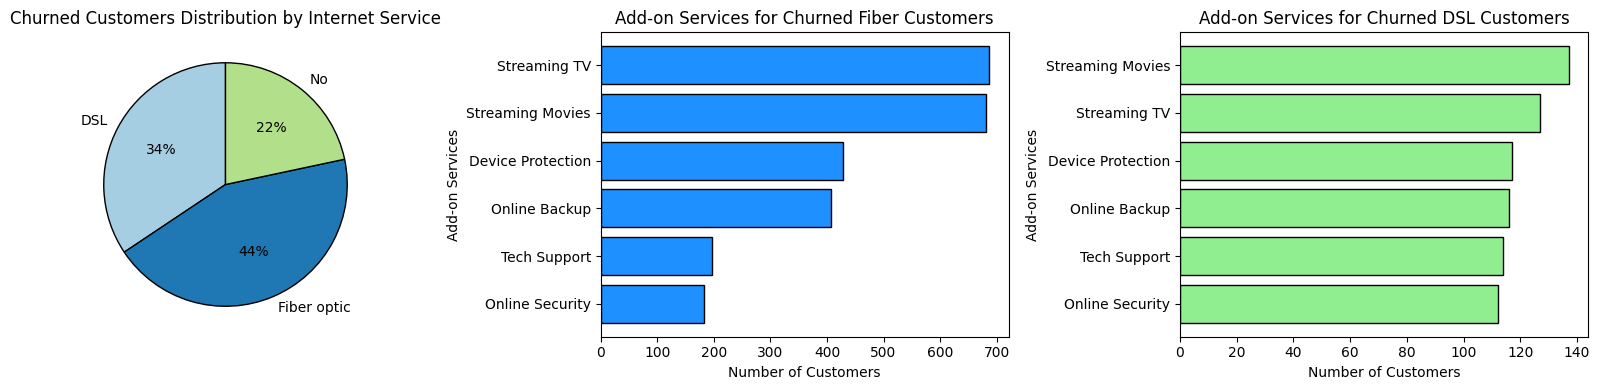

In [18]:
# @title
# Data setup
internet_service_orders_all_churned = df.groupby('Internet Service')['CustomerID'].count().reset_index()

total_churned_orders = {
    'Online Security': churned[churned['Online Security'] == 'Yes']['CustomerID'].count(),
    'Online Backup': churned[churned['Online Backup'] == 'Yes']['CustomerID'].count(),
    'Device Protection': churned[churned['Device Protection'] == 'Yes']['CustomerID'].count(),
    'Tech Support': churned[churned['Tech Support'] == 'Yes']['CustomerID'].count(),
    'Streaming TV': churned[churned['Streaming TV'] == 'Yes']['CustomerID'].count(),
    'Streaming Movies': churned[churned['Streaming Movies'] == 'Yes']['CustomerID'].count()
} # Collect total churned orders counts for all users

fiber_churned= churned[churned['Internet Service'] == 'Fiber optic']
total_churned_orders_fiber = {
    'Online Security': fiber_churned[fiber_churned['Online Security'] == 'Yes']['CustomerID'].count(),
    'Online Backup': fiber_churned[fiber_churned['Online Backup'] == 'Yes']['CustomerID'].count(),
    'Device Protection': fiber_churned[fiber_churned['Device Protection'] == 'Yes']['CustomerID'].count(),
    'Tech Support': fiber_churned[fiber_churned['Tech Support'] == 'Yes']['CustomerID'].count(),
    'Streaming TV': fiber_churned[fiber_churned['Streaming TV'] == 'Yes']['CustomerID'].count(),
    'Streaming Movies': fiber_churned[fiber_churned['Streaming Movies'] == 'Yes']['CustomerID'].count()
} # Collect total churned orders counts for fiber users

dsl_churned = churned[churned['Internet Service'] == 'DSL']
total_churned_orders_dsl = {
    'Online Security': dsl_churned[dsl_churned['Online Security'] == 'Yes']['CustomerID'].count(),
    'Online Backup': dsl_churned[dsl_churned['Online Backup'] == 'Yes']['CustomerID'].count(),
    'Device Protection': dsl_churned[dsl_churned['Device Protection'] == 'Yes']['CustomerID'].count(),
    'Tech Support': dsl_churned[dsl_churned['Tech Support'] == 'Yes']['CustomerID'].count(),
    'Streaming TV': dsl_churned[dsl_churned['Streaming TV'] == 'Yes']['CustomerID'].count(),
    'Streaming Movies': dsl_churned[dsl_churned['Streaming Movies'] == 'Yes']['CustomerID'].count()
} # Collect total churned orders counts for DSL users

df_total_churned_orders = pd.DataFrame(list(total_churned_orders.items()), columns=['Product', 'CustomerID']).sort_values(by='CustomerID', ascending=True)
df_total_churned_orders_fiber = pd.DataFrame(list(total_churned_orders_fiber.items()), columns=['Product', 'CustomerID']).sort_values(by='CustomerID', ascending=True)
df_total_churned_orders_dsl = pd.DataFrame(list(total_churned_orders_dsl.items()), columns=['Product', 'CustomerID']).sort_values(by='CustomerID', ascending=True)

# Subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 3 columns

# First pie chart: Customers Distribution by Internet Service
axes[0].pie(
    internet_service_orders_all_churned['CustomerID'],
    labels=internet_service_orders_all_churned['Internet Service'],
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Churned Customers Distribution by Internet Service')

# Second bar chart: Fiber customers by add-on services
axes[1].barh(
    df_total_churned_orders_fiber['Product'],
    df_total_churned_orders_fiber['CustomerID'],
    color='dodgerblue',
    edgecolor='black'
)
axes[1].set_title('Add-on Services for Churned Fiber Customers')
axes[1].set_xlabel('Number of Customers')
axes[1].set_ylabel('Add-on Services')

# Third bar chart: DSL customers by CustomerID for add-on services
axes[2].barh(
    df_total_churned_orders_dsl['Product'],
    df_total_churned_orders_dsl['CustomerID'],
    color='lightgreen',
    edgecolor='black'
)
axes[2].set_title('Add-on Services for Churned DSL Customers')
axes[2].set_xlabel('Number of Customers')
axes[2].set_ylabel('Add-on Services')

# Adjust layout
plt.tight_layout()
plt.show()


### 🤝 **Churn Insight 6:** Churn Reasons



- **Pie Chart:** Competitor (33%) is top churn factor, followed by customer experience (29%), product (13%), and price (13%).
- **Bar Chart:** Attitude of support person and competitor's higher download speeds are leading churn reasons.
- **Actions:** Analyze competitors, enhance customer service, review product and pricing.

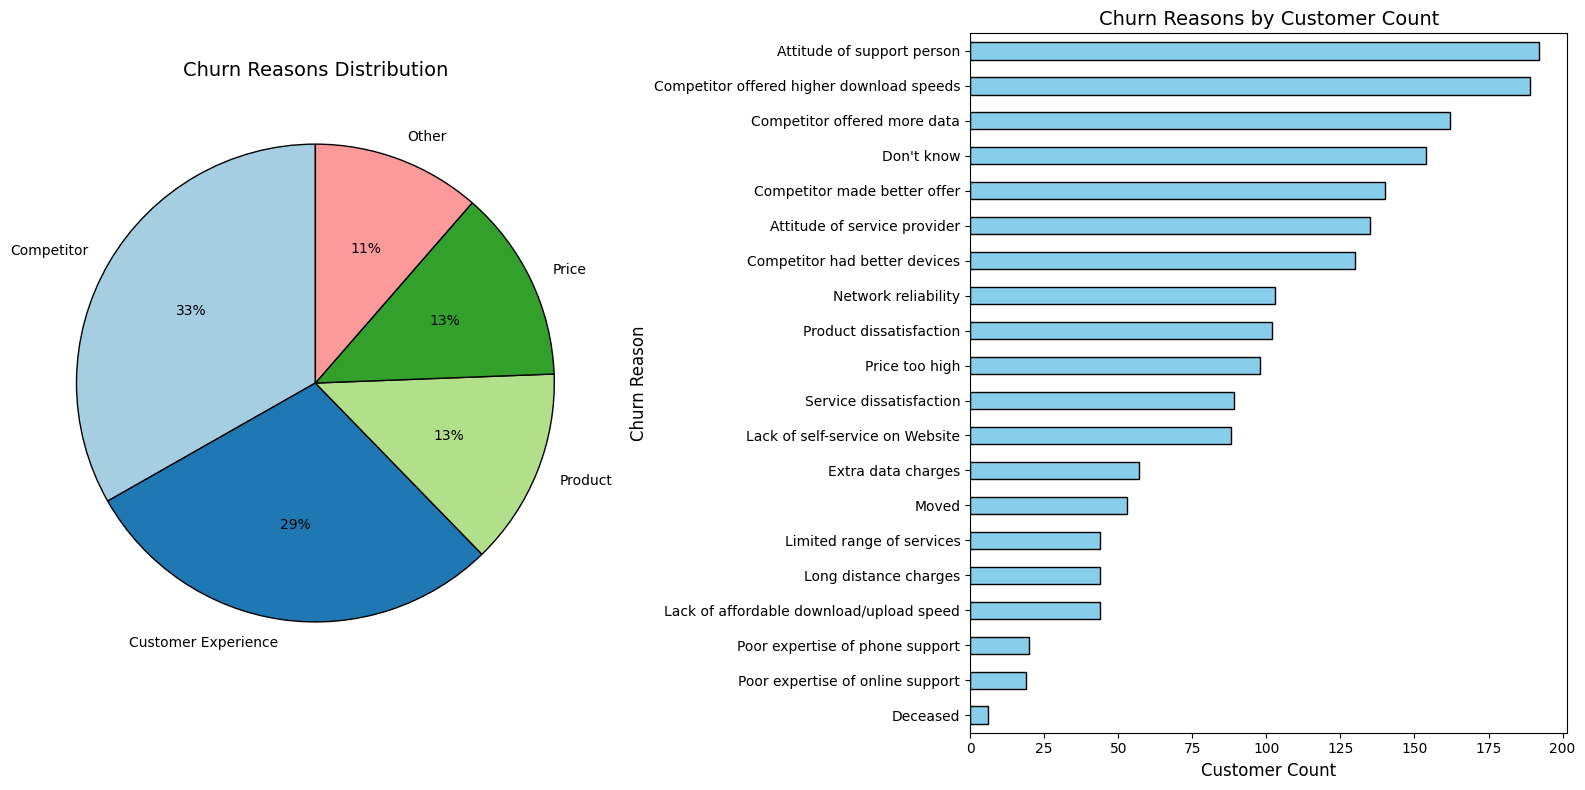

In [19]:
# @title
def Reason_grouping(x):
    if x in ['Product dissatisfaction','Network reliability','Limited range of services']:
        return 'Product'
    elif x in ['Price too high','Lack of affordable download/upload speed','Long distance charges','Extra data charges']:
        return 'Price'
    elif x in ['Service dissatisfaction','Lack of self-service on Website','Attitude of service provider','Poor expertise of online support','Poor expertise of phone support', 'Attitude of support person']:
        return 'Customer Experience'
    elif x in ['Competitor made better offer','Competitor had better devices','Competitor offered higher download speeds','Competitor offered more data'] :
        return 'Competitor'
    else:
        return 'Other'

# Group and filter reason types
reason_type = churned.apply(lambda x: Reason_grouping(x['Churn Reason']), axis=1).value_counts()


# Count churn reasons
churn_reasons = churned.groupby('Churn Reason')['CustomerID'].count().sort_values(ascending=True)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie plot
reason_type.plot(
    kind='pie',
    ax=axes[0],
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.cm.Paired(range(len(reason_type))),
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('Churn Reasons Distribution', fontsize=14)
axes[0].set_ylabel('')  # Hide y-axis label for cleaner look

# Bar plot
churn_reasons.plot(
    kind='barh',
    ax=axes[1],
    color='skyblue',
    edgecolor='black'
)
axes[1].set_title('Churn Reasons by Customer Count', fontsize=14)
axes[1].set_xlabel('Customer Count', fontsize=12)
axes[1].set_ylabel('Churn Reason', fontsize=12)
axes[1].tick_params(axis='y', labelsize=10)
plt.tight_layout()


### ⚡ **Churn Insight 7 (Extra):**  High Churned Customers with Tenure Less Than One Year



- **Orders:** Streaming Movies and TV are the primary churn drivers, **mirroring trends seen in other churned customer groups.**
- **Reasons:** Competitor offerings are the leading cause of churn, followed by issues related to customer experience, **consistent with patterns among normal churn customers.**
- **Actions:** These customers should be **managed similarly to other normal churn customers.**

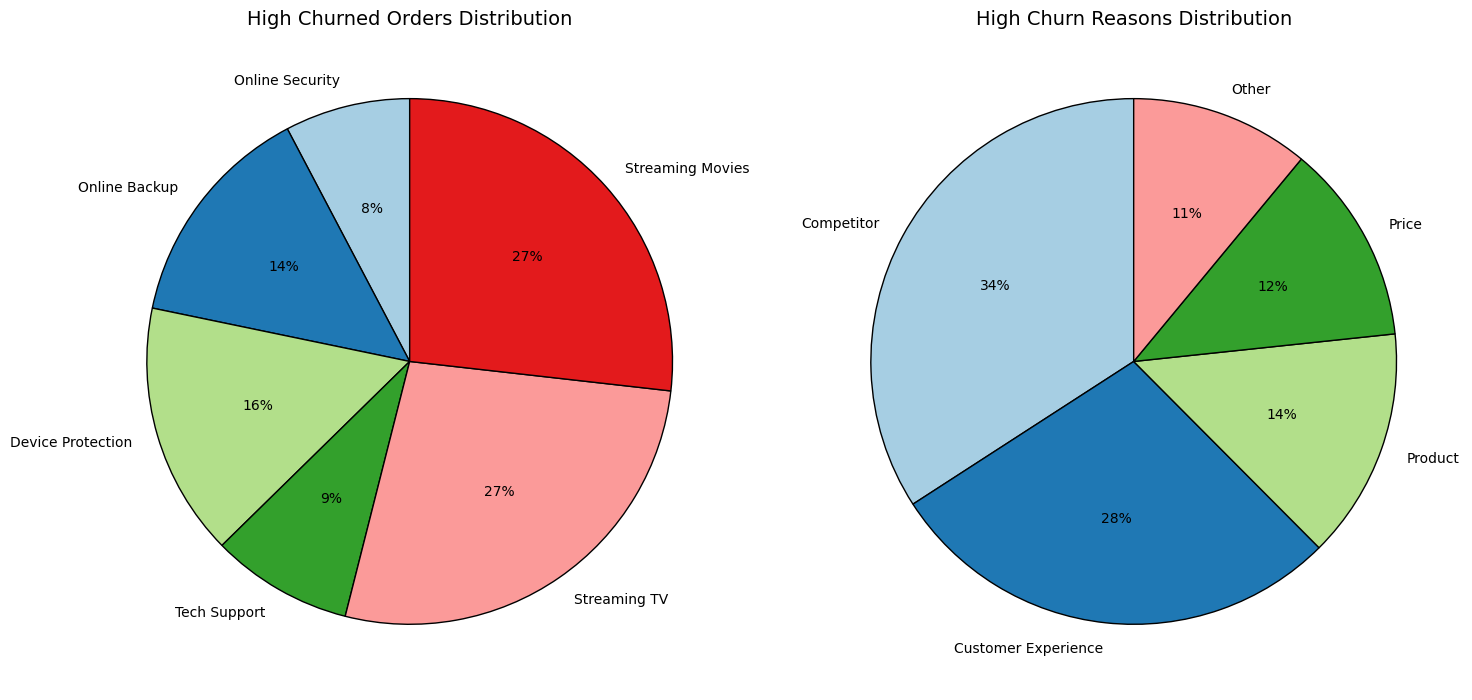

In [20]:
# @title
# Filter high churn customers and calculate total_high_churned_orders
high_churn = churned[churned['Tenure Months'] < 12]
total_high_churned_orders = {
    'Online Security': high_churn[high_churn['Online Security'] == 'Yes']['CustomerID'].count(),
    'Online Backup': high_churn[high_churn['Online Backup'] == 'Yes']['CustomerID'].count(),
    'Device Protection': high_churn[high_churn['Device Protection'] == 'Yes']['CustomerID'].count(),
    'Tech Support': high_churn[high_churn['Tech Support'] == 'Yes']['CustomerID'].count(),
    'Streaming TV': high_churn[high_churn['Streaming TV'] == 'Yes']['CustomerID'].count(),
    'Streaming Movies': high_churn[high_churn['Streaming Movies'] == 'Yes']['CustomerID'].count()
}
# Calculate high_churn_reason and exclude 'Other'
high_churn_reason = high_churn.apply(lambda x: Reason_grouping(x['Churn Reason']), axis=1).value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Pie plot 1: High churn orders distribution
axes[0].pie(
    total_high_churned_orders.values(),
    labels=total_high_churned_orders.keys(),
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
axes[0].set_title('High Churned Orders Distribution', fontsize=14)

# Pie plot 2: High churn reasons distribution (excluding "Other")
axes[1].pie(
    high_churn_reason.values,
    labels=high_churn_reason.index,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'black'}
)
axes[1].set_title('High Churn Reasons Distribution', fontsize=14)
plt.tight_layout()
plt.show()


### 🌟 **Churn Insights Summary**

1. **Retention & Churn:** **Retention** at **73.5%** is strong, but **26.5% churn** needs attention. 📊  
2. **Tenure & Charges:** **Short-tenure (<1 year) customers** churn most; **affordability (<$30)** boosts retention. 💰  
3. **Demographics:** Churners are often **non-senior, single**, with **no dependents**. 🧍‍♂️  
4. **Phone Services:** **Neither** phone service **nor** multi-lines significantly impact churn. 📞  
5. **Internet & Add-ons:** **Fiber Optic** and dissatisfaction with **Streaming TV/Movies** drive churn. 🌐
6. **Churn Reasons:** **Competitors (37.5%)** lead causes, followed by **customer experience (32.8%)**. 🤝  
7. **High-Risk Customers:** Streaming and competition remain top drivers for **<1-year tenure churners**. ⚡  

# Part 4 - Feature Engineering
---

## Transform


In [21]:
# @title
df_copy = df.copy()
def transform_data(df):
  categorical_columns = ['City', 'Internet Service', 'Contract', 'Payment Method', 'Gender'] # Categorical columns requiring mapping

  # Apply label encoding for categorical columns
  label_encoder = LabelEncoder()
  for each in categorical_columns:
      df[each] = label_encoder.fit_transform(df[each])

  binary_columns = [
      'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
      'Multiple Lines', 'Online Security', 'Online Backup',
      'Device Protection', 'Tech Support', 'Streaming TV',
      'Streaming Movies', 'Paperless Billing'
  ] # Binary columns requiring mapping

  # Apply binary mapping to other binary columns
  for column in binary_columns:
      df[column] = df[column].map({'Yes': 1, 'No': 0})

  return df
# Did not transform Churn Label

In [22]:
# @title
# Apply the data transform in one go
df = transform_data(df)

## Feature Selection

- The **Total Charges** column was removed due to its high correlation with other numerical fields, which could lead to multicollinearity issues in the model.
- **Country** and **State** were excluded because they introduced redundancy and added no distinct value to the dataset.
- The **City** column was dropped because its label-encoded values exceeded a range of 500. This discrepancy made it incompatible with z-score-scaled columns and binary features, creating an unmanageable gap in numerical ranges.

In [23]:
# @title
# Select the features column and target
features = ['Zip Code', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges']
target = ['Churn Value']

X = df[features]
y = df[target]

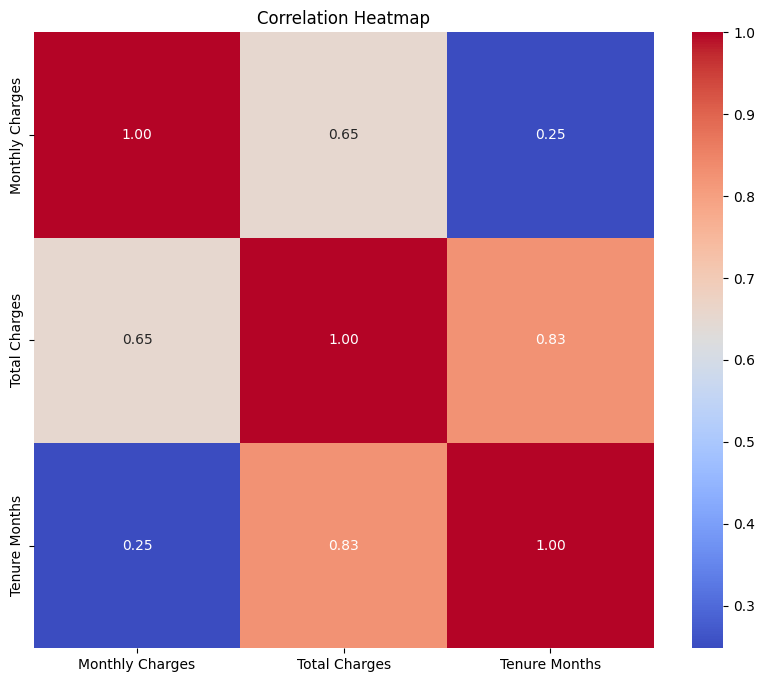

In [24]:
# @title
# Plot the heatmap of the numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Monthly Charges', 'Total Charges' ,'Tenure Months']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Total Chargers is strong correlated with Tenure Months and Monthly Charges, so we decide to remove it from feature columns.

## Normalisation

**Histogram distribution of numerical feature columns**

The figures illustrate that none of the numerical columns follow a normal distribution and exhibit long-tailed outliers on both ends. To address this issue, log transformation is necessary for these columns.

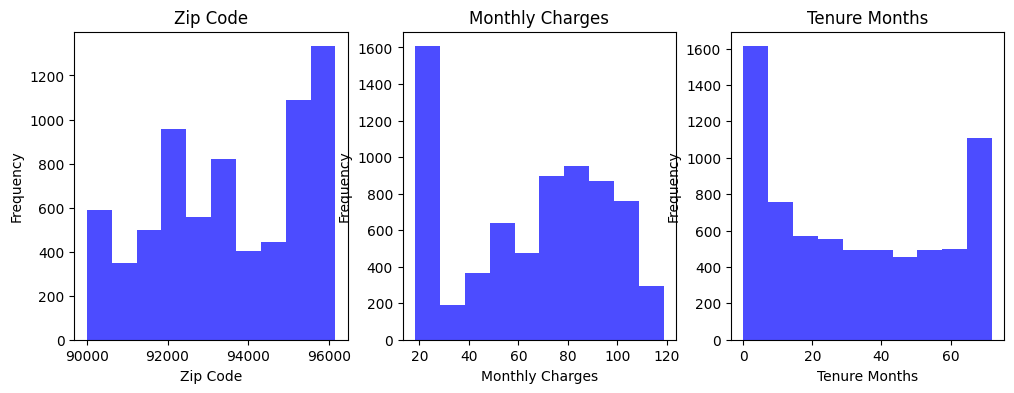

In [25]:
# @title
numeric_columns = ['Zip Code','Monthly Charges','Tenure Months']

fig, axis = plt.subplots(1, 3, figsize=(12, 4))
for i, column in enumerate(numeric_columns):
    axis[i].hist(X[column], bins=10, alpha=0.7, color='blue')
    axis[i].set_title(column)
    axis[i].set_xlabel(column)
    axis[i].set_ylabel('Frequency')
plt.show()

## Standardisation

**Statistics of numerical columns after log transformation**
Compared to the 'Tenure Months' and 'Monthly Charges' columns, the values in the 'Zip Code' column are significantly larger. To ensure consistency during feature engineering, Z-score standardization will be applied to adjust its scale.

In [26]:
# @title
X_copy= X.copy()
X_copy[numeric_columns] = np.log(X_copy[numeric_columns] + 1)
X_copy[numeric_columns].describe()

,Zip Code,Monthly Charges,Tenure Months
count,7043.000000,7043.000000,7043.000000
mean,11.445763,4.043347,3.036873
std,0.020006,0.580288,1.155510
min,11.407587,2.957511,0.000000
25%,11.430663,3.597312,2.302585
50%,11.446283,4.267597,3.401197
75%,11.465331,4.509210,4.025352
max,11.473790,4.785406,4.290459


**Evaluate the Variance Inflation Factor (VIF)** on the feature copy columns after implementing all the feature engineering techniques outlined above.

In [27]:
# @title

for each in numeric_columns:
  X_copy[each] = (X_copy[each] - X_copy[each].mean()) / X_copy[each].std()

**VIF**

After applying scaling, the Variance Inflation Factor (VIF) values for all columns are approximately 1, which is well below the threshold of 5, indicating excellent multicollinearity reduction.

In [28]:
# @title
vif_data = pd.DataFrame({
    'Feature': X_copy[numeric_columns].columns,
    'VIF': [variance_inflation_factor(X_copy[numeric_columns].values, i) for i in range(X_copy[numeric_columns].shape[1])]
})
print(vif_data)

           Feature       VIF
0         Zip Code  1.000117
1  Monthly Charges  1.039476
2    Tenure Months  1.039445


## Feature Engineering Function

As previously discussed, we will now proceed with the implementation of log transformation and Z-score standardization.

In [29]:
# @title
def feature_eng(X):
    for each in numeric_columns:
        # Handle non-positive values for log transformation
        if (X[each] <= 0).any():
            X[each] = np.log(X[each] + 1)  # Add 1 to avoid issues with 0 or negatives
        else:
            X[each] = np.log(X[each])  # Apply normal log if all values are positive

        # Z-score standardization
        X[each] = (X[each] - X[each].mean()) / X[each].std()

    # Add intercept for statsmodels
    X = sm.add_constant(X)
    return X

# Part 5 Modeling
---

## Train-Test Split

In [30]:
# @title
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

## Apply Feature Engineering

In [31]:
# @title
X_train_fe = feature_eng(X_train)
X_test_fe = feature_eng(X_test)

## Pipeline the Smote and K-fold Cross Validation at the Same Time

In [32]:
# @title
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=60)),
    ('classifier', LogisticRegression(random_state=60))
])


stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=60)


param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga']
}

# GridSearch
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train_fe, y_train)

# Best score
cv_score = grid_search.best_score_

/Users/sennanli/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sennanli/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sennanli/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sennanli/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when 

## Get the Best Model Parameters

In [33]:
# @title
grid_search.best_score_
grid_search.best_params_
print(f"Grid search best score is {grid_search.best_score_}")
print(f"grid search best params is \n{grid_search.best_params_}")

Grid search best score is 0.8508397708875076
grid search best params is 
{'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


## Train the Logistic Regression based on the Best Parameters with Train sets

In [34]:
# @title
model = grid_search.estimator
model.fit(X_train_fe, y_train)

/Users/sennanli/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('smote', SMOTE(random_state=60)),
                ('classifier', LogisticRegression(random_state=60))])

## Predict the Churn Probabilities on Both Train and Test sets

**Train sets**

In [35]:
# @title
# Predict probabilities on the train data
y_prob_train = model.predict_proba(X_train_fe)[:, 1]  # Extract probabilities for class 1
y_pred_train = np.where(y_prob_train > 0.5, 1, 0) # Set the threshold to 0.5

# Print classification report
print(metrics.classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      4135
           1       0.55      0.78      0.65      1499

    accuracy                           0.77      5634
   macro avg       0.73      0.77      0.74      5634
weighted avg       0.81      0.77      0.78      5634



**Test sets**

In [36]:
# @title
# Predict probabilities on the test data
y_prob = model.predict_proba(X_test_fe)[:, 1]  # Extract probabilities for class 1
y_pred = np.where(y_prob > 0.5, 1, 0) # Set the threshold to 0.5

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1039
           1       0.55      0.78      0.64       370

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



**Performance:**

The model demonstrates no signs of overfitting and emphasizes achieving a high recall rate. On average, it achieved a recall of 0.77, precision of 0.81, accuracy of 0.77, and an F1-score of 0.78. However, there is a slight drop in precision when predicting true positives.

## Predict the Churn Probabilities on Whole Data Sets

In [37]:
# @title
# Predict probabilities on the whole data

X_fe = feature_eng(X.copy())
churn_prob = model.predict_proba(X_fe)[:, 1]  # Extract probabilities for class 1
churn_pred = np.where(churn_prob > 0.5, 1, 0) # Set the threshold to 0.5

**Confustion Metrix Evaluation**

- **Class 0 (Non-Churners):** High precision (0.91) and good F1-score (0.83), though recall is slightly lower (0.77).
- **Class 1 (Churners):** Strong recall (0.78) ensures most churners are identified, but lower precision (0.55) indicates many false positives.
- **Overall:** Accuracy is 0.77, with a weighted F1-score of 0.78, balancing the class imbalance well.

In [38]:
# @title
# Print classification report
print(metrics.classification_report(y, churn_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      5174
           1       0.55      0.78      0.64      1869

    accuracy                           0.77      7043
   macro avg       0.73      0.77      0.74      7043
weighted avg       0.81      0.77      0.78      7043



**ROC Evaluation**

The Area Under the Curve (AUC) of **0.85** (**well above threshold of 0.5**), confirms that the model has a strong ability to differentiate between classes. It's a sign that the model is well-calibrated for predicting churn probabilities.

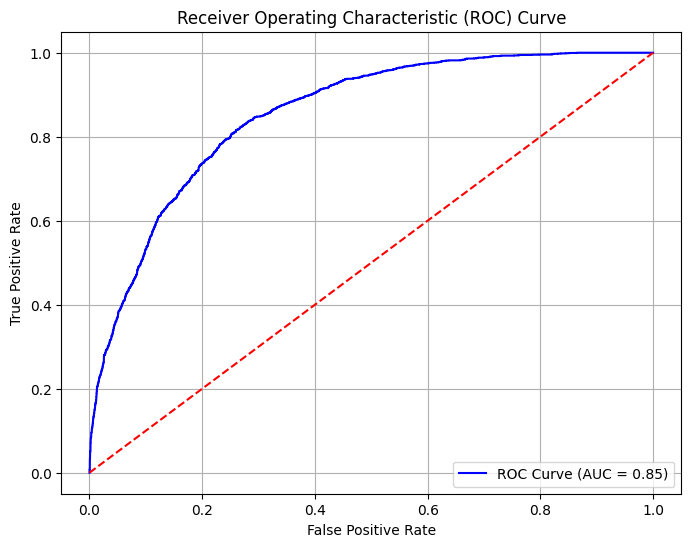

In [39]:
# @title
# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and threshold values
fpr, tpr, thresholds = roc_curve(y, churn_prob)

# Compute AUC (Area Under Curve)
roc_auc = roc_auc_score(y, churn_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Export the Full Customers List with Churn Value = 0

In [40]:
# @title
export = df_copy
export['Churn Prob'] = churn_prob
export = export[export['Churn Value'] == 0]
export = export[['CustomerID', 'Churn Prob']]
# export.to_csv('Customers List.csv', index=False)